# Home Assignment No. 3: Part 1 (Theory and Practice)
To solve this task, you will write a lot of code to try several machine learning methods for dimensionality reduction and anomaly detection.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places inside notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In these cases you have to create **MARKDOWN** cell with your comments right after the corresponding code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute all, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

## Task 1. Practice with Different Anomaly Detection Algorithms. (5 points)
### Task 1.1. (1 point)
Explore two One-Class SVM methods, write down corresponding minimization functions (try to keep equal notations) and explain the differences (1-2 sentences).
1. Scholkopf et al.: http://papers.nips.cc/paper/1723-support-vector-method-for-novelty-detection.pdf
2. Tax et al.:  https://link.springer.com/content/pdf/10.1023/B:MACH.0000008084.60811.49.pdf

#### Your solution:

- From the first article the minimiation function is:
$\underset{w \in F, \xi \in R^{l}, \rho \in R}{\operatorname{min}}\frac{1}{2}\|w\|^2 + \frac{1}{\nu l} \sum_{i} \xi_{i} - \rho$ \
subject to $(w \cdot Ф(x_i)) \geq \rho - \xi_i$,   $\xi_i \geq 0.$

- From the second article the minimization function is:
$\underset{w,\xi,\rho}{\operatorname{min}}\frac{1}{2}\|w\|^2 + \frac{1}{\nu l} \sum_{i} \xi_{i} - \rho$ \
subject to $(w \cdot x_i) \geq \rho - \xi_i$,   $\xi_i \geq 0.$

In the first case we take into account  a feature map $Ф$,
i.e. a map into a new dot product space such that the dot product in the image of $Ф$ can be
computed by evaluating some simple kernel $K(x,y)=(Ф(x),Ф(y))$
In the second case we stay in the current dot product space. The case with kernel is more robust, since we can utilize different kernels.

### Task 1.2. (2 points)

1. **(1 pt.)** For the `frod_detection` dataset,  predict the anomaly with any three sklearn built-in Anomaly detection methods: https://scikit-learn.org/stable/modules/outlier_detection.html

**Note:** do not forget to relabel predictions from Anomaly detection methods, as they could be negative.

2. **(1 pt.)** Estimate the __contamination__ (or impurity) on the training set as the ratio of anomaly objects in the whole sample. Explore, how the `roc_auc_score` changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [95]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('data/creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [89]:
# impurity estimation on test data
contamination = np.sum(test_y==1)/len(test_y)# >>> your solution here <<<
contamination

0.01693743518838576

In [92]:
from sklearn.ensemble import IsolationForest  # >>> your solution here <<<
import warnings
warnings.filterwarnings('ignore')

for i in [0.1, 1, 10]:

    model = IsolationForest(contamination=i*contamination)

    model.fit(train_X)
    labels_isolation = model.predict(test_X)
    labels_isolation[labels_isolation==1] = 0
    labels_isolation[labels_isolation==-1] = 1
    print()
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))


Contamination:  0.002   ROC/AUC:  0.531 Precision:  0.984

Contamination:  0.017   ROC/AUC:  0.731 Precision:  0.984

Contamination:  0.169   ROC/AUC:  0.875 Precision:  0.853


In [93]:
from sklearn.covariance import EllipticEnvelope
for i in [0.1, 1, 10]:
    
    model = EllipticEnvelope(contamination=i*contamination)
    model.fit(train_X)
    
    labels_isolation = model.predict(test_X) 
    labels_isolation[labels_isolation==1] = 0
    labels_isolation[labels_isolation==-1] = 1
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

Contamination:  0.002   ROC/AUC:  0.5 Precision:  0.982
Contamination:  0.017   ROC/AUC:  0.67 Precision:  0.982
Contamination:  0.169   ROC/AUC:  0.779 Precision:  0.842


In [187]:
from sklearn.neighbors import LocalOutlierFactor
for i in [0.1, 1, 10]:
    
    model = LocalOutlierFactor(contamination=i*contamination,
                           novelty=True)
    model.fit(train_X)
    labels_isolation = model.predict(test_X)
    labels_isolation[labels_isolation==1] = 0
    labels_isolation[labels_isolation==-1] = 1
    print('Contamination: ', np.round(contamination * i, 3), ' ', 
          'ROC/AUC: ', np.round(roc_auc_score(test_y, labels_isolation), 3),
          'Precision: ', np.round(precision_score(test_y, labels_isolation, average = 'micro'), 3))

Contamination:  0.002   ROC/AUC:  0.499 Precision:  0.981
Contamination:  0.017   ROC/AUC:  0.5 Precision:  0.963
Contamination:  0.169   ROC/AUC:  0.506 Precision:  0.817


### Task 1.3. (2 points)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance.

As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. **(1 pt.)** Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 
2. **(1 pt.)**  Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold. Write 1-2 sentences on your findings.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [389]:
# your favorite classifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

xgb = XGBClassifier(n_jobs=-1)
skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_score_ = []
pr_score = []
oversampler = RandomOverSampler(random_state=0, sampling_strategy=0.8)
for train_index, test_index in skf.split(test_X, test_y):
    train_X_ = test_X.iloc[train_index].values
    train_y_ = test_y.iloc[train_index].values
    test_X_ = test_X.iloc[test_index].values
    test_y_ = test_y.iloc[test_index].values
    train_X_, train_y_ = oversampler.fit_sample(train_X_, train_y_)
    xgb.fit(train_X_, train_y_)
    xgb_pred = xgb.predict(test_X_)
    roc_auc_score_.append(roc_auc_score(y_score=xgb_pred, y_true=test_y_))
    pr_score.append(precision_score(y_pred=xgb_pred, y_true=test_y_))
        
print('ROC/AUC mean: ', np.mean(roc_auc_score_), 'std: ', np.std(roc_auc_score_))    
print('Precision mean: ', np.mean(pr_score), 'std: ', np.std(pr_score))

ROC/AUC mean:  0.9294724487274525 std:  0.07785886900538944
Precision mean:  0.9433333333333334 std:  0.08698658900466591


In [388]:
# ensemble of classifiers
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import VotingClassifier

skf = StratifiedKFold(n_splits=10, random_state = 42)
skf.get_n_splits(test_X, test_y)

roc_auc_score_ = []
roc_auc_score_and = []
roc_auc_score_or = []
pr_score = []
pr_score_and = []
pr_score_or = []

ifc = IsolationForest(random_state = 42)
ifc.fit(train_X)

#undersampler = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
oversampler = RandomOverSampler(random_state=0, sampling_strategy=1.)

for train_index, test_index in skf.split(test_X, test_y):
    train_X_ = test_X.iloc[train_index].values
    train_y_ = test_y.iloc[train_index].values
    test_X_ = test_X.iloc[test_index].values
    test_y_ = test_y.iloc[test_index].values

    ifc.fit(train_X_, train_y_)
    train_X_, train_y_ = oversampler.fit_resample(train_X_, train_y_)
    #train_X_, train_y_ = undersampler.fit_sample(train_X_, train_y_)
    
    
    xgb.fit(train_X_, train_y_)

    
    ifc_pred = ifc.predict(test_X_)
    xgb_pred = xgb.predict(test_X_)
    ifc_pred[ifc_pred==1] = 0
    ifc_pred[ifc_pred==-1] = 1
    
    
    final_pred_and = np.logical_and(ifc_pred, xgb_pred)

    roc_auc_score_and.append(roc_auc_score(test_y_, final_pred_and))
    pr_score_and.append(precision_score(test_y_, final_pred_and))

print('ROC/AUC mean: ', np.mean(roc_auc_score_and), 'std: ', np.std(roc_auc_score_and))    
print('Precision mean: ', np.mean(pr_score_and), 'std: ', np.std(pr_score_and))

ROC/AUC mean:  0.8471478873239437 std:  0.10133989393304418
Precision mean:  0.9583333333333334 std:  0.08539125638299665


- I managed to increase Precision score a little. Precision score is defined as (TP)/(TP+FP), meaning that it's good at evaluating the model in ability not-to assign 'anomaly' to some observation. In other words, by performing such 'and-voting' we managed to decrease the number of False Positives. Positive, in our case, is anomaly. Yet, the roc-auc score, which is more sensible to False Negatives, has decreased meaning that there are more anomalies left undetected.

## Task 2. Practice with Different Clustering Algorithms. (4 points)
### Task 2.1. Explore KMeans and Gaussian Mixture algorithms. (2 points)
Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. **(1 pt.)** Apply the algorithm with the true number of clusters and at least two **other settings** for the number of clusters: a smaller and a larger number than the true one;
2. **(1 pt.)** For each number of clusters **vizualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

True number of clusters is 15


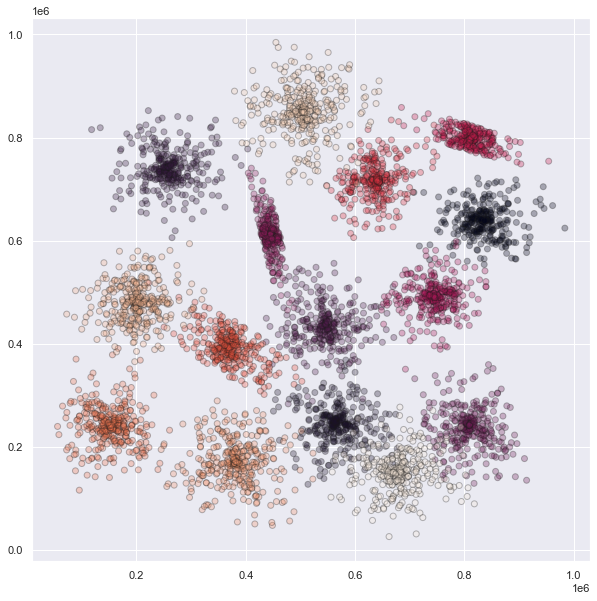

In [117]:
points, labels = np.loadtxt('data/clustering.txt'), np.loadtxt('data/clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [97]:
### BEGIN Solution
from sklearn.cluster import KMeans, Birch, AffinityPropagation, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

points_std = StandardScaler().fit_transform(points)

grid_kmeans = ParameterGrid({'init': ('k-means++', 'random'),
              'algorithm': ('auto','full','elkan'),
              'n_init': (5,10,15),
              'max_iter': (200,300,400),
             })

s_score_kmeans = []
mi_score_kmeans = []

for params in grid_kmeans:
    pred = KMeans(n_clusters=15, random_state=0, **params).fit_predict(points_std)
    s_score_kmeans.append([silhouette_score(points_std, pred, random_state = 0), params])
    mi_score_kmeans.append([mutual_info_score(labels, pred),params])
    
    
grid_gm =  ParameterGrid({'covariance_type': ('full', 'tied', 'diag', 'spherical'),
                          'init_params': ('kmeans','random'),
                          'max_iter': (50, 100, 200),
                          'reg_covar': (1e-7,1e-6,1e-5),
                          'tol': (1e-4,1e-3,1e-2)
                         })
    
s_score_gm = []
mi_score_gm = []    

for params in grid_gm:
    pred = GaussianMixture(n_components=15, random_state=0, **params).fit_predict(points_std)
    s_score_gm.append([silhouette_score(points_std, pred, random_state = 0), params])
    mi_score_gm.append([mutual_info_score(labels, pred),params])
    
    
grid_birch = ParameterGrid({'branching_factor': (10,50,75),
                            'threshold': (0.1,0.2,0.3,0.4,0.5)
                           })
s_score_birch = []
mi_score_birch = []    

for params in grid_birch:
    pred = Birch(n_clusters=15, **params).fit_predict(points_std)
    s_score_birch.append([silhouette_score(points_std, pred, random_state = 0), params])
    mi_score_birch.append([mutual_info_score(labels, pred),params])  
    
    
grid_ac = ParameterGrid({'linkage': ('ward','complete','average','single')})
s_score_ac = []
mi_score_ac = []    

for params in grid_ac:
    pred = AgglomerativeClustering(n_clusters=15, **params).fit_predict(points_std)
    s_score_ac.append([silhouette_score(points_std, pred, random_state = 0), params])
    mi_score_ac.append([mutual_info_score(labels, pred),params])  

### END Solution

In [98]:
print('Kmeans: ')
max_s = -1
max_mi = 0
for i in range(len(s_score_kmeans)):
    
    #print('s_score: ',s_score_kmeans[i][0], 'mi_Score: ', mi_score_kmeans[i][0])
    if s_score_kmeans[i][0]>max_s:
        max_s = s_score_kmeans[i][0]
        best_params_s = s_score_kmeans[i][1]
    if mi_score_kmeans[i][0]>max_mi:
        max_mi = mi_score_kmeans[i][0]
        best_params_mi = mi_score_kmeans[i][1]
print('s_score: ', max_s, 'params: ', best_params_s)
print('mi_score: ', max_mi, 'params: ', best_params_mi)
pred = KMeans(n_clusters=15).fit_predict(points_std)
print('s_score with default_params: ', silhouette_score(points_std, pred, random_state = 0))
print('mi_score with default_params: ', mutual_info_score(labels, pred))
print('________________________________________________')




print('Gaussian Mix')
max_s = -1
max_mi = 0
for i in range(len(s_score_gm)):
    #print('s_score: ',s_score_gm[i][0], 'mi_Score: ', mi_score_gm[i][0])
    if s_score_gm[i][0] > max_s:
        max_s = s_score_gm[i][0]
        best_params_s = s_score_gm[i][1]
    if mi_score_gm[i][0] > max_mi:
        max_mi = mi_score_gm[i][0]
        best_params_mi = mi_score_gm[i][1]
print('s_score: ', max_s, 'params: ', best_params_s)
print('mi_score: ', max_mi, 'params: ', best_params_mi)
pred = GaussianMixture(n_components=15).fit_predict(points_std)
print('s_score with default_params: ', silhouette_score(points_std, pred, random_state = 0))
print('mi_score with default_params: ', mutual_info_score(labels, pred))
print('________________________________________________')




print('Birch')
max_s = -1
max_mi = 0
for i in range(len(s_score_birch)):
    #print('s_score: ',s_score_birch[i][0], 'mi_Score: ', mi_score_birch[i][0])
    if s_score_birch[i][0] > max_s:
        max_s = s_score_birch[i][0]
        best_params_s = s_score_birch[i][1]
    if mi_score_birch[i][0] > max_mi:
        max_mi = mi_score_birch[i][0]
        best_params_mi = mi_score_birch[i][1]
print('s_score: ', max_s, 'params: ', best_params_s)
print('mi_score: ', max_mi, 'params: ', best_params_mi)
pred = Birch(n_clusters=15).fit_predict(points_std)
print('s_score with default_params: ', silhouette_score(points_std, pred, random_state = 0))
print('mi_score with default_params: ', mutual_info_score(labels, pred))
print('________________________________________________')  





print('AgglomerativeClustering')
max_s = -1
max_mi = 0
for i in range(len(s_score_ac)):
    if s_score_ac[i][0] > max_s:
        max_s = s_score_ac[i][0]
        best_params_s = s_score_ac[i][1]
    if mi_score_ac[i][0]> max_mi:
        max_mi = mi_score_ac[i][0]
        best_params_mi = mi_score_ac[i][1]
    #print('s_score: ',s_score_ac[i][0], 'mi_Score: ', mi_score_ac[i][0])
print('s_score: ', max_s, 'params: ', best_params_s)
print('mi_score: ', max_mi, 'params: ', best_params_mi)
pred = AgglomerativeClustering(n_clusters=15).fit_predict(points_std)
print('s_score with default_params: ', silhouette_score(points_std, pred, random_state = 0))
print('mi_score with default_params: ', mutual_info_score(labels, pred))

Kmeans: 
s_score:  0.6263633798992377 params:  {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 200, 'n_init': 10}
mi_score:  2.5620872010569116 params:  {'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 200, 'n_init': 5}
s_score with default_params:  0.6263584768902496
mi_score with default_params:  2.5620872010569107
________________________________________________
Gaussian Mix
s_score:  0.6261461842825289 params:  {'covariance_type': 'tied', 'init_params': 'kmeans', 'max_iter': 50, 'reg_covar': 1e-07, 'tol': 0.0001}
mi_score:  2.5695720910608153 params:  {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 50, 'reg_covar': 1e-07, 'tol': 0.0001}
s_score with default_params:  0.585466644515621
mi_score with default_params:  2.49828005469421
________________________________________________
Birch
s_score:  0.6188595731407757 params:  {'branching_factor': 50, 'threshold': 0.4}
mi_score:  2.540815596145972 params:  {'branching_factor': 50, 'threshold': 0.4}
s_score 

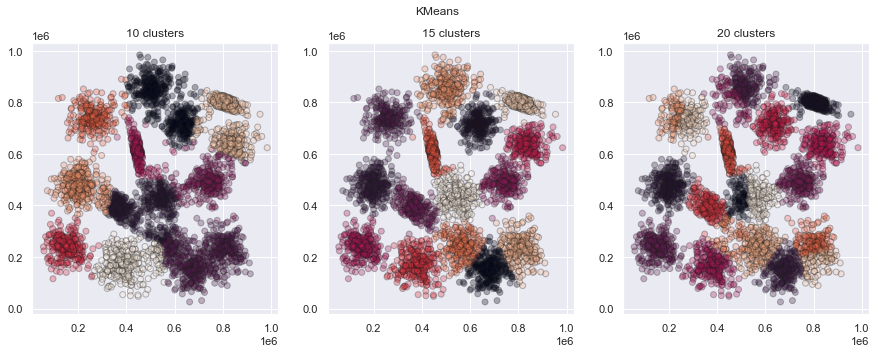

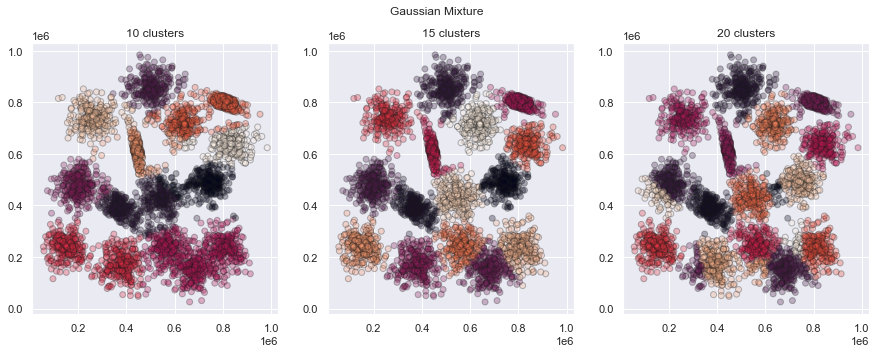

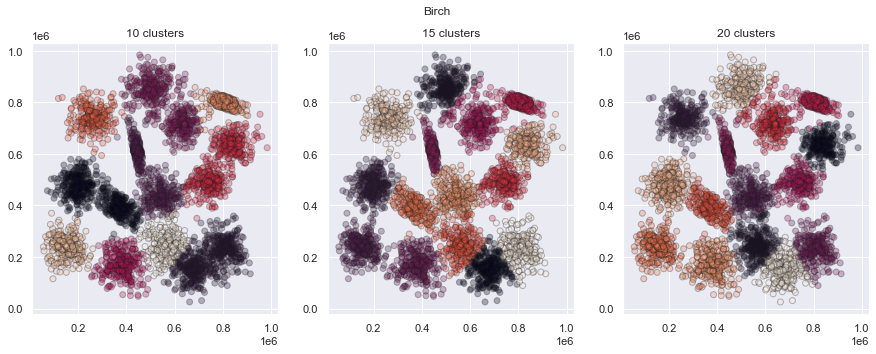

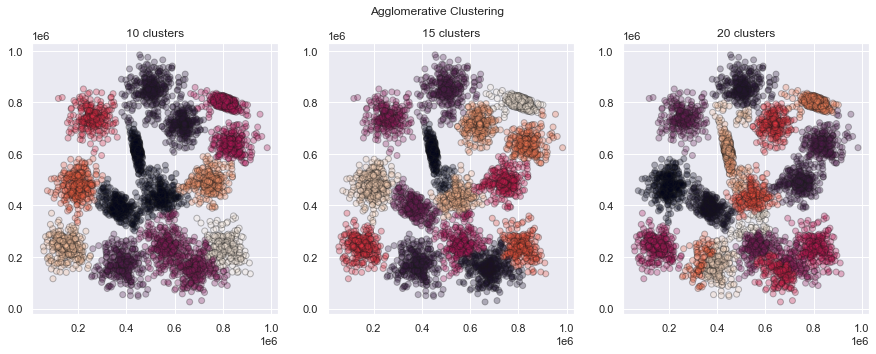

In [99]:
# Apply the algorithm with the true number of clusters and at least two other
# settings for the number of clusters: a smaller and a larger number than the true one;

### BEGIN Solution
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('KMeans')
mi_scores_kmeans = []
s_scores_kmeans = []
mi_scores_kmeans_std = []
s_scores_kmeans_std = []
for i in np.arange(10, 21).astype(int):
    pred_std = KMeans(n_clusters = i, random_state = 0).fit_predict(points_std)
    pred = KMeans(n_clusters = i, random_state = 0).fit_predict(points)
    mi_scores_kmeans_std.append(mutual_info_score(labels, pred_std))
    s_scores_kmeans_std.append(silhouette_score(points_std, pred_std, random_state=0))
    mi_scores_kmeans.append(mutual_info_score(labels, pred))
    s_scores_kmeans.append(silhouette_score(points, pred, random_state=0))
    if i==10:
        ax1.set_title('10 clusters')
        ax1.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
    if i==15:
        ax2.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax2.set_title('15 clusters')
    if i==20:
        ax3.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax3.set_title('20 clusters')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Gaussian Mixture')
mi_scores_gm = []
s_scores_gm = []
mi_scores_gm_std = []
s_scores_gm_std = []
for i in np.arange(10, 21).astype(int):
    pred_std = GaussianMixture(n_components = i, random_state = 0,
                           covariance_type='tied', max_iter=50).fit_predict(points_std)
    pred = GaussianMixture(n_components = i, random_state = 0,
                           covariance_type='tied', max_iter=50).fit_predict(points)    
    mi_scores_gm_std.append(mutual_info_score(labels, pred_std))
    s_scores_gm_std.append(silhouette_score(points_std, pred_std, random_state=0))
    mi_scores_gm.append(mutual_info_score(labels, pred))
    s_scores_gm.append(silhouette_score(points, pred, random_state=0))
    if i==10:
        ax1.set_title('10 clusters')
        ax1.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
    if i==15:
        ax2.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax2.set_title('15 clusters')
    if i==20:
        ax3.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax3.set_title('20 clusters')


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Birch')
mi_scores_birch = []
s_scores_birch = []
mi_scores_birch_std = []
s_scores_birch_std = []
for i in np.arange(10, 21).astype(int):
    pred_std = Birch(n_clusters = int(i), branching_factor=50, threshold=0.4).fit_predict(points_std)
    mi_scores_birch_std.append(mutual_info_score(labels, pred_std))
    s_scores_birch_std.append(silhouette_score(points_std, pred_std, random_state=0))
    pred = Birch(n_clusters = int(i), branching_factor=50, threshold=0.4).fit_predict(points)
    mi_scores_birch.append(mutual_info_score(labels, pred))
    s_scores_birch.append(silhouette_score(points, pred, random_state=0))
    if i==10:
        ax1.set_title('10 clusters')
        ax1.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
    if i==15:
        ax2.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax2.set_title('15 clusters')
    if i==20:
        ax3.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax3.set_title('20 clusters')



fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
fig.suptitle('Agglomerative Clustering')
mi_scores_ac = []
s_scores_ac = []
mi_scores_ac_std = []
s_scores_ac_std = []
for i in np.arange(10, 21).astype(int):
    pred_std = AgglomerativeClustering(n_clusters = i).fit_predict(points_std)
    pred = AgglomerativeClustering(n_clusters = i).fit_predict(points)
    mi_scores_ac_std.append(mutual_info_score(labels, pred_std))
    s_scores_ac_std.append(silhouette_score(points_std, pred_std, random_state=0))
    
    mi_scores_ac.append(mutual_info_score(labels, pred))
    s_scores_ac.append(silhouette_score(points, pred, random_state=0))
    if i==10:
        ax1.set_title('10 clusters')
        ax1.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
    if i ==15:
        ax2.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax2.set_title('15 clusters')
    if i==20:
        ax3.scatter(points[:,0], points[:,1], c=pred_std, alpha=0.3, edgecolor='k')
        ax3.set_title('20 clusters')
### END Solution

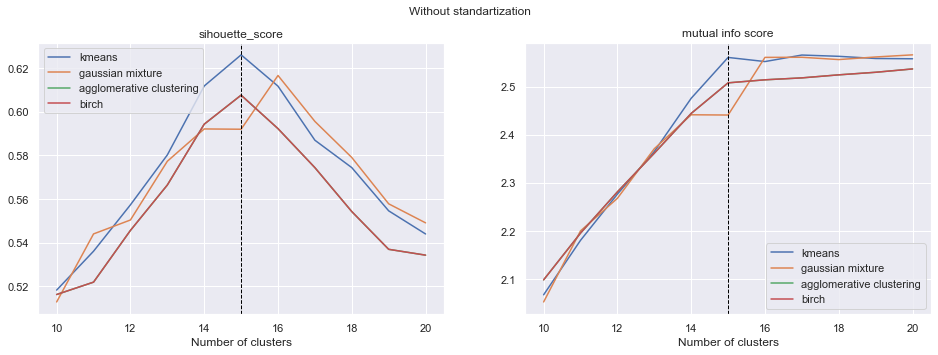

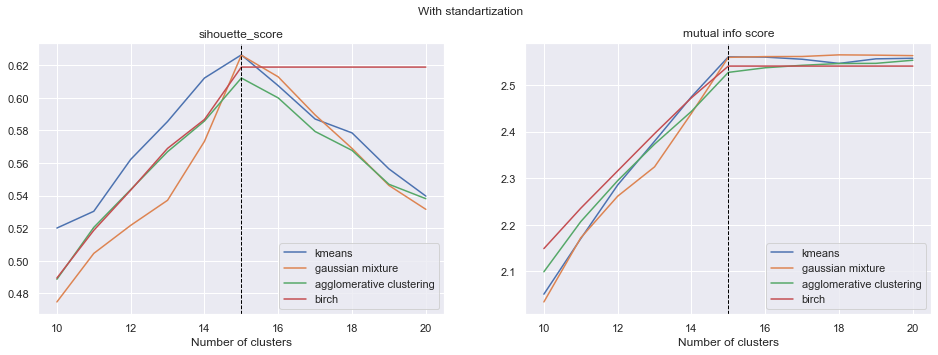

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('Without standartization')
ax1.plot(np.arange(10, 21), s_scores_kmeans, label='kmeans')
ax1.plot(np.arange(10, 21), s_scores_gm, label='gaussian mixture')
ax1.plot(np.arange(10, 21), s_scores_ac, label = 'agglomerative clustering')
ax1.plot(np.arange(10, 21), s_scores_birch, label='birch')
ax1.axvline(15, lw = 1, color = 'black', linestyle='--')
ax1.set_title('sihouette_score')
ax1.set_xlabel('Number of clusters')
ax1.legend()


ax2.plot(np.arange(10, 21), mi_scores_kmeans, label='kmeans')
ax2.plot(np.arange(10, 21), mi_scores_gm, label='gaussian mixture')
ax2.plot(np.arange(10, 21), mi_scores_ac, label='agglomerative clustering')
ax2.plot(np.arange(10, 21), mi_scores_birch, label='birch')
ax2.axvline(15, lw = 1, color = 'black', linestyle='--')
ax2.set_title('mutual info score')
ax2.set_xlabel('Number of clusters')
ax2.legend()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))
fig.suptitle('With standartization')
ax1.plot(np.arange(10, 21), s_scores_kmeans_std, label='kmeans')
ax1.plot(np.arange(10, 21), s_scores_gm_std, label='gaussian mixture')
ax1.plot(np.arange(10, 21), s_scores_ac_std, label = 'agglomerative clustering')
ax1.plot(np.arange(10, 21), s_scores_birch_std, label='birch')
ax1.axvline(15, lw = 1, color = 'black', linestyle='--')
ax1.set_title('sihouette_score')
ax1.set_xlabel('Number of clusters')
ax1.legend()

ax2.plot(np.arange(10, 21), mi_scores_kmeans_std, label='kmeans')
ax2.plot(np.arange(10, 21), mi_scores_gm_std, label='gaussian mixture')
ax2.plot(np.arange(10, 21), mi_scores_ac_std, label='agglomerative clustering')
ax2.plot(np.arange(10, 21), mi_scores_birch_std, label='birch')
ax2.axvline(15, lw = 1, color = 'black', linestyle='--')
ax2.set_title('mutual info score')
ax2.set_xlabel('Number of clusters')
ax2.legend()

### Task 2.2. Finding the Number of Clusters with Bootstrap. (2 points)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. **(1 pt.)** Estimate variance of the metric and construct normal 95% **confidence interval (CI)**;
2. **(1 pt.)** **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__  
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

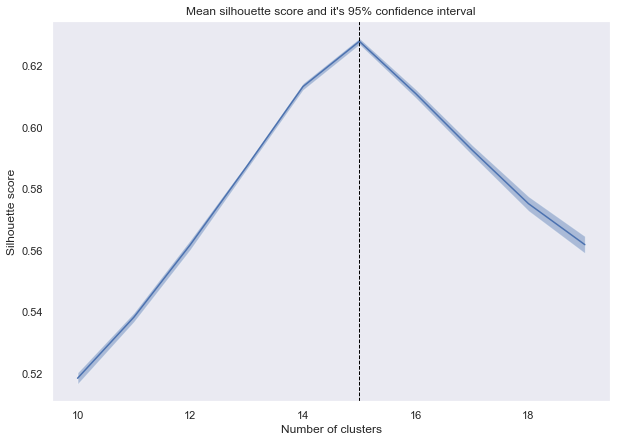

In [113]:
from tqdm import tqdm_notebook

### BEGIN Solution
import sklearn
from sklearn import cluster

cluster_ns = list(np.arange(10,20))
sample_number = 50

# >>> your code here <<<
points_std = StandardScaler().fit_transform(points)

scores = []
scores_upper = []
scores_bottom = []

for i, n_clusters in tqdm_notebook(enumerate(cluster_ns)):
    silhouette_scores = []
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0)
    for n in range(sample_number):
        bootsrap_points = sklearn.utils.resample(points_std, n_samples=points_std.shape[0])
        kmeans.fit(bootsrap_points)
        pred = kmeans.predict(bootsrap_points)
        silhouette_scores.append(silhouette_score(bootsrap_points, pred, random_state = 0))
    scores.append(np.mean(silhouette_scores))
    #Z-value for 95% confidence interval is 1.96
    scores_upper.append(scores[-1] + 1.96*np.std(silhouette_scores)/np.sqrt(n))
    scores_bottom.append(scores[-1] - 1.96*np.std(silhouette_scores)/np.sqrt(n))
    
# >>> your code here <<<
plt.figure(figsize = (10,7))
plt.plot(cluster_ns, scores)
plt.axvline(15, lw = 1, color = 'black', linestyle='--')
plt.fill_between(cluster_ns, scores_bottom, scores_upper, alpha=0.4)
plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel('Number of clusters')   
plt.ylabel('Silhouette score')
### END Solution

## Task 3. MNIST, kMNIST component analysis and manifold learning. (6 points)
### Task 3.1. (2 points)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimentionality, decompose the dataset on pinciple components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case use can use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. **(1 pt.)** Estimate the intrinsic dimentionality of the dataset. Provide the plot.
2. **(1 pt.)** Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [101]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import seaborn as sns

sns.set()

dg = datasets.load_digits()

data = StandardScaler().fit_transform(dg.data)

In [102]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
 
def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k+1).fit(X)
    dist, ind = neighb.kneighbors(X) # distances between the samples and points
    dist = dist[:, 1:] # the distance between the first points to first points (as basis ) equals zero
    # the first non trivial point
    dist = dist[:, 0:k]# including points k-1
    assert dist.shape == (X.shape[0], k) # requirments are there is no equal points
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1]) # dinstanec betveen the bayeasan statistics
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample
 
def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1): # in order to reduse the noise by eliminating of the nearest neibours 
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k
 
def repeated(func, X, nb_iter=100, random_state=None, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []
 
    iters = range(nb_iter) 
    for i in iters:
        if mode == 'bootstrap':# and each point we want to resample with repeating points to reduse the errors 
            #232 111 133 
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

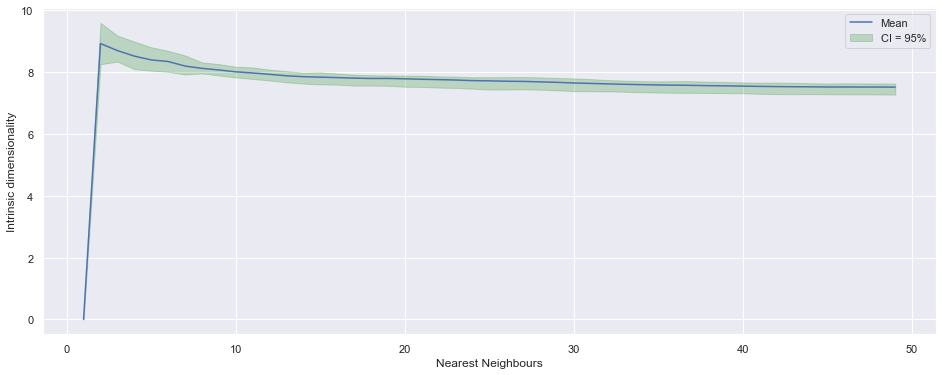

In [103]:
# Estimate the intrinsic dimentionality of the dataset. 

### BEGIN Solution
intdim_k_repeated  = repeated(intrinsic_dim_scale_interval, data, random_state=42, nb_iter = 10, k1 = 1, k2 = 50)
scores = []
score_upper = []
score_bottom = []
for i in range(len(intdim_k_repeated[0])):
    score = np.array(intdim_k_repeated)[:,i]
    scores.append(score.mean())
    score_upper.append(np.quantile(score, 0.025))
    score_bottom.append(np.quantile(score, 0.975))

x = np.arange(0,len(scores))
  
plt.figure(figsize=(16, 6))
plt.plot(x, scores, label = 'Mean')
plt.fill_between(x, score_bottom, score_upper, alpha=0.2, color = 'green', label = 'CI = 95%')
plt.xlabel('Nearest Neighbours')
plt.ylabel('Intrinsic dimensionality')
plt.grid(True)
plt.legend()
plt.show()

### END Solution

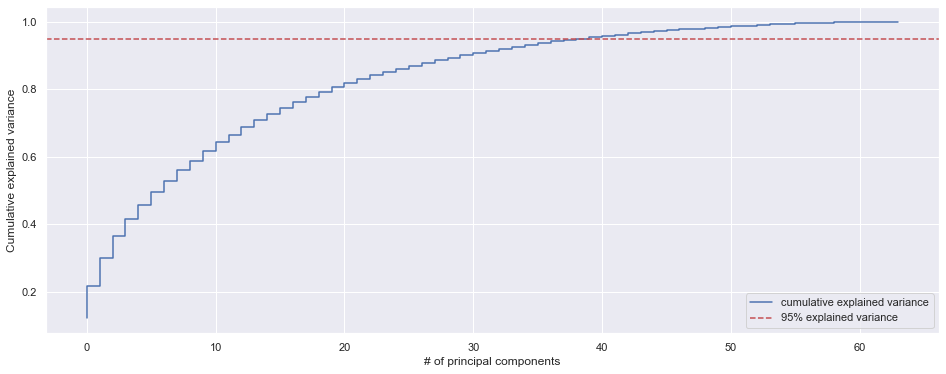

In [575]:
# Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component.
from sklearn.decomposition import PCA

### BEGIN Solution
pca = PCA().fit(data)
plt.figure(figsize=(16, 6))
plt.step(np.arange(0, data.shape[1]), np.cumsum(pca.explained_variance_ratio_),
         label = 'cumulative explained variance')


plt.axhline(0.95, linestyle = '--', color = 'r', label = '95% explained variance')
plt.xlabel('# of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.legend()
### END Solution

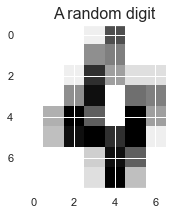

In [578]:
# Plot the example of back-decomposition with 6 different 
# set of components and corresponding explained variance. You can choose any digit from the dataset.

plt.figure(5, figsize=(3, 3))
plt.imshow(dg.images[4], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('A random digit', fontsize=16)
plt.show()

y = dg.target
X = dg.images.reshape(-1, 8*8) / dg.images.max()

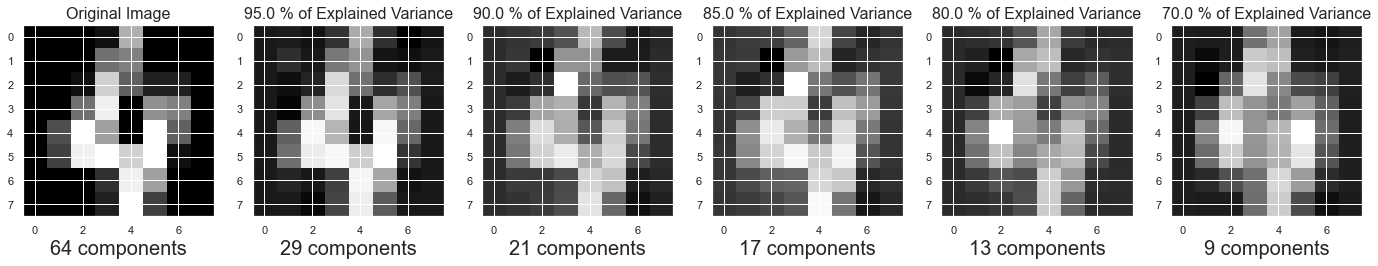

In [651]:
explained_variance = [0.95, 0.90, 0.85, 0.8, 0.7]
number_to_draw = 4
plt.figure(figsize=(24,4))
plt.subplot(1, 6, 1);
images = dg.images.reshape(dg.images.shape[0], 8*8)
plt.imshow(images[number_to_draw].reshape(8,8), cmap = plt.cm.gray)
plt.xlabel(str(images[number_to_draw].shape[0])+' components', fontsize = 20)
plt.title('Original Image', fontsize = 16)

for i, variance in zip(np.arange(2,7), explained_variance):
    pca = PCA(n_components=variance)
    trans_data = pca.fit_transform(images)
    inverse_transform = pca.inverse_transform(trans_data)
    plt.subplot(1, 6, i)
    plt.imshow(inverse_transform[number_to_draw].reshape(8,8), cmap=plt.cm.gray)
    plt.xlabel(str(pca.n_components_)+' components', fontsize = 20)
    plt.title((str(variance*100)+' % of Explained Variance'), fontsize = 16)

### Task 3.2. (2 points)

Here we will visualise the decomposition in order to observe how data diverges across different manofild learning methods. We are  to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Visualise ICA, PCA and Isomap 3D decomposition on 3 components in `plotly`. Make sure the data is whitened (scaled), enjoy nice plots :) 
2. **(1 pt.)** Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimention**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
3. **(1 pt.)** Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 senteces.

__NOTE:__ In first task, `plotly` will not display the plot in offline notebook, so it is just for you to visualize the projection in 3D.

In [105]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import colorlover as cl

init_notebook_mode(connected=True)

In [106]:
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap
from sklearn.preprocessing import StandardScaler
### BEGIN Solution

# >>> your solution here <<<
#data = StandardScaler().fit_transform(dg.data)
data = dg.data
pca = PCA(n_components=3)
iso = Isomap(n_components=3)
ica = FastICA(n_components=3)

data_pca = StandardScaler().fit_transform(pca.fit_transform(data))
data_iso = StandardScaler().fit_transform(iso.fit_transform(data))
data_ica = StandardScaler().fit_transform(ica.fit_transform(data))
### END Solution

In [107]:
digits_3d = pd.DataFrame({
    'x': data_pca[:, 0], 
    'y': data_pca[:, 1], 
    'z': data_pca[:, 2],
    'label': dg['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization PCA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)



digits_3d = pd.DataFrame({
    'x': data_iso[:, 0], 
    'y': data_iso[:, 1], 
    'z': data_iso[:, 2],
    'label': dg['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization Isomap',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)


digits_3d = pd.DataFrame({
    'x': data_ica[:, 0], 
    'y': data_ica[:, 1], 
    'z': data_ica[:, 2],
    'label': dg['target'],
})

colors = cl.scales['10']['qual']['Paired']
data = []

for i in range(10):
    x = digits_3d[digits_3d['label'].astype('int') == i]['x']
    y = digits_3d[digits_3d['label'].astype('int') == i]['y']
    z = digits_3d[digits_3d['label'].astype('int') == i]['z']
    
    color = colors[i]
    
    trace = {
        'name': str(i),
        'x': x,
        'y': y,
        'z': z,
        'type': 'scatter3d',
        'mode': 'markers',
        'marker': {
            'size': 5,
            'color': color 
        }
    }
    data.append(trace)

layout = go.Layout(
    title='MNIST visualization ICA',
    width=900,
    height=600
)

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link = False)

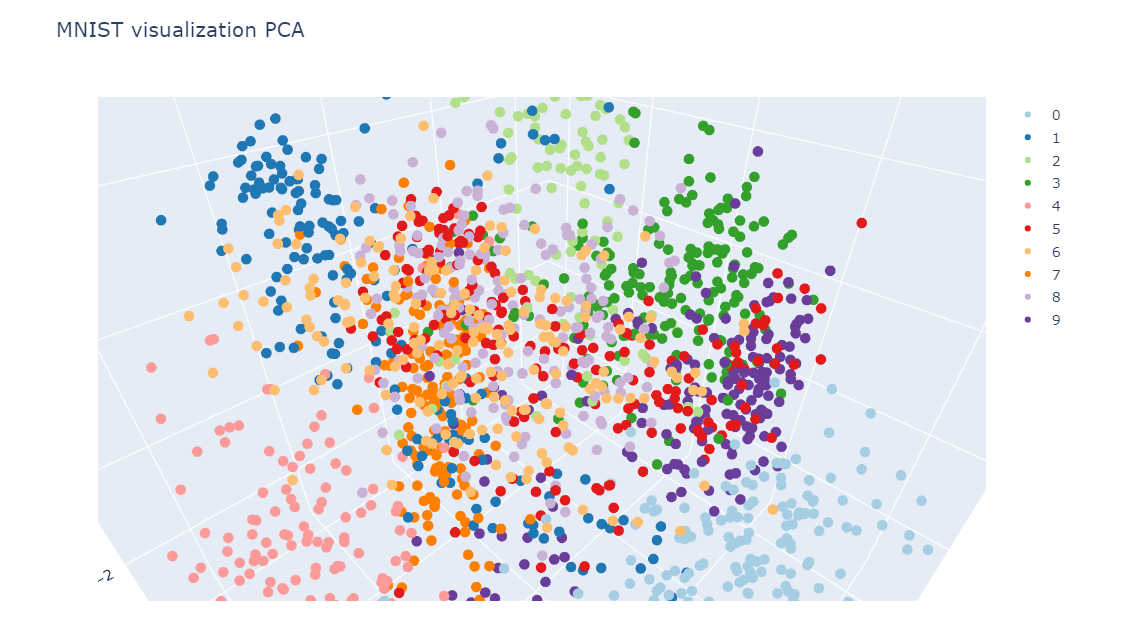

In [29]:
from IPython.display import Image
Image("pca.png")

In [108]:
# Calculate new features on the data with ICA, PCA and Isomap and the classification accuracy on these features 

from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver = 'lbfgs', multi_class='multinomial')
rkf = RepeatedKFold(n_splits = 5, n_repeats = 3, random_state = 42)

### BEGIN Solution

# >>> your solution here <<<
scores = list()


data = StandardScaler().fit_transform(dg.data)
#data = dg.data

### BEGIN Solution
target = dg.target

n_components = 15
pca = PCA(n_components=n_components)
iso = Isomap(n_components=n_components)
ica = FastICA(n_components=n_components)
data_pca = pca.fit_transform(data)
data_iso = iso.fit_transform(data)
data_ica = ica.fit_transform(data)

scores_pca = []
for train_index, test_index in rkf.split(data_pca):
    X_train = data_pca[train_index]
    X_test = data_pca[test_index]
    y_train = target[train_index] 
    y_test = target[test_index]
    
    logreg.fit(X_train, y_train)
    scores_pca.append(logreg.score(X_test, y_test))
std_pca = np.std(scores_pca)
scores.append(scores_pca)
scores_ica = []
for train_index, test_index in rkf.split(data_ica):
    X_train = data_ica[train_index]
    X_test = data_ica[test_index]
    y_train = target[train_index] 
    y_test = target[test_index]
    
    logreg.fit(X_train, y_train)
    scores_ica.append(logreg.score(X_test, y_test))

std_ica = np.std(scores_ica)
scores.append(scores_ica)

scores_iso = []
for train_index, test_index in rkf.split(data_iso):
    X_train = data_iso[train_index]
    X_test = data_iso[test_index]
    y_train = target[train_index] 
    y_test = target[test_index]
    
    logreg.fit(X_train, y_train)
    scores_iso.append(logreg.score(X_test, y_test))
std_iso = np.std(scores_iso)
scores.append(scores_iso)


df = pd.DataFrame({"dim.reduction method": ['PCA', 'ICA', 'Isomap'],
                   "mean accuracy": [np.mean(scores_pca), np.mean(scores_ica), np.mean(scores_iso)],
                   "std": [std_pca, std_ica, std_iso]
                  })
df

,dim.reduction method,mean accuracy,std
0,PCA,0.933410,0.015536
1,ICA,0.852718,0.023341
2,Isomap,0.959003,0.009068


In [725]:
from scipy.stats import ttest_ind

_, p1 = ttest_ind(scores[0], scores[1])
print('Statistically significant improvement of PCA decomposition over ICA: p-value ', p1)

Statistically significant improvement of PCA decomposition over ICA: p-value  2.0094844128251908e-11


In [726]:
_, p2 = ttest_ind(scores[2], scores[0])
print('Statistically significant improvement of Isomap decomposition over PCA: p-value ', p2)

Statistically significant improvement of Isomap decomposition over PCA: p-value  1.3190443240741711e-05


- Both PCA and Isomap have shown good classifier improvement. We observe a small p-value meaning that we can reject the null hypothesis of identical average scores. From the DataFrame above we see that with Isomap we gained best accuracy score. Also, by looking at 3D representation of MNIST, Isomap shows the best 'point clouds' clustering, thus giving statistically significant improvement on the classification accuracy.

### Task 3.3. kMNIST dimensionality reduction. (2 points)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engeneer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than `93%`. Is it fair to `fit` with manifold Learning method for both train and test samples? 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`, you will find it in __Part 2__.  Save 3 first components of your projection on `train` sample to `.csv`, we are going to visually compare them later.


In [14]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.decomposition import PCA
def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('data/kmnist/kmnist-train-imgs.npz')
x_test = load('data/kmnist/kmnist-test-imgs.npz')
y_train = load('data/kmnist/kmnist-train-labels.npz')
y_test = load('data/kmnist/kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

### BEGIN Solution
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)
pca = PCA(n_components=350)

data_iso_train = pca.fit_transform(x_train)
data_iso_test = pca.transform(x_test)

knn.fit(data_iso_train, y_train)

print(knn.score(data_iso_test, y_test))

iso1 calculated
iso2 calculated
0.9058


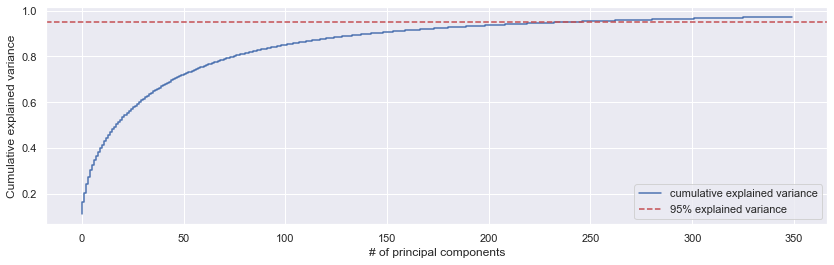

In [23]:
from matplotlib import pyplot as plt

pca = PCA(n_components=350).fit(x_train)
datka = pca.transform(x_train)
plt.figure(figsize=(14, 4))
plt.step(np.arange(0, datka.shape[1]), np.cumsum(pca.explained_variance_ratio_),
         label = 'cumulative explained variance')


plt.axhline(0.95, linestyle = '--', color = 'r', label = '95% explained variance')
plt.xlabel('# of principal components')
plt.ylabel('Cumulative explained variance')
plt.grid(True)
plt.legend()

In [ ]:
scores = []
for n in np.arange(10, 320, 10):
    knn = KNeighborsClassifier(n_neighbors=1, n_jobs=-1)
    pca = PCA(n_components=int(n))
    data_pca_train = pca.fit_transform(x_train)
    data_pca_test = pca.transform(x_test)
    knn.fit(data_pca_train, y_train)
    scores.append(knn.score(data_pca_test, y_test))

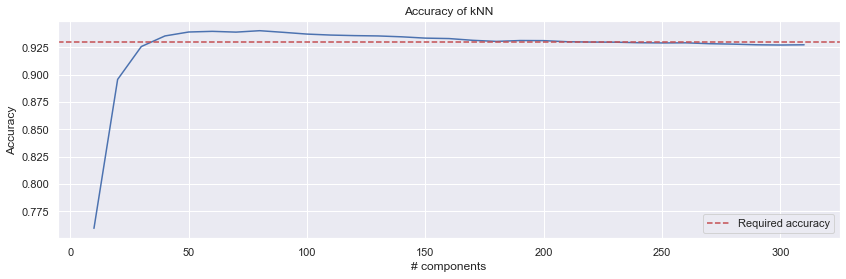

In [42]:
plt.figure(figsize=(14, 4))
plt.plot(np.arange(10, 320, 10), scores)
plt.axhline(y=0.93, color='r', linestyle='--', label='Required accuracy')
plt.title('Accuracy of kNN')
plt.xlabel('# components')
plt.ylabel('Accuracy')
plt.legend()

In [61]:
pca = PCA(n_components=np.arange(10, 320, 10)[np.argmax(scores)])
data_pca_train = pca.fit_transform(x_train)
dataframe = pd.DataFrame(data_pca_train[:,0])
dataframe['2'] = data_pca_train[:,1]
dataframe['3'] = data_pca_train[:,2]
dataframe['target'] = y_train
dataframe.to_csv('pca_componentss.csv', index=False)

#### Voilla! you are done, have a good day ;)